<a href="https://colab.research.google.com/github/majorquev/DBDC_202507_Programacion_en_R_para_ciencia_de_datos/blob/main/Evaluaciones/C2/V19_Control2_pauta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Control 2 Pauta


# Sección 1
## Transacciones de ventas de productos


En la ruta `./datasets` se encuentran cinco arhivos que contienen información de transacciones de ventas de una empresa de artículos de oficina con operaciones en LATAM. Los archivos mencionados contienen la siguiente información:

- `cabecera.csv`: Contiene información de la cabecera de la transacción (fechas de pedido y envío, e id del cliente). Un Id de pedido puede contener varios items que fueron comprados.
- `detalle.csv`: Corresponde al detalle de la compra, acá se encuentra información de total de la venta de cada producto incluido en la compra, cantidad, descuento y valoración de la compra de cada propucto por parte del cliente.
- `producto.csv`: Tabla maestra de productos, contiene descripción, categoría y subcategoría de producto.
- `clientes.csv`: Tabla maestra de clientes. Contiene un registro pro cada cliente, su identificador, nombre y segmento.
- `direcciones.csv`: Tabla de direcciones de cada cliente (un cliente puede tener más de una dirección registrada). Por motivos de seguridad solo se hace referencia al país, estado y ciudad de cada dirección.

A continuación se muestra la desripción de cada campo de cada una de las tablas.

| Tabla  | Campo              | Descripción                                            |
| ------ | ------------------ | ------------------------------------------------------ |
| cabecera | `id_del_pedido`      | Identificador único del pedido (ej: `MX-2021-162775`). |
| cabecera | `fecha_del_pedido`   | Fecha en que se realizó el pedido.                     |
| cabecera | `fecha_de_envio`     | Fecha en que el pedido fue despachado.                 |
| cabecera | `metodo_de_envio`    | Tipo de envío seleccionado (ej: `Rápido`, `Estándar`). |
| cabecera | `id_del_cliente`     | Identificador del cliente que realizó el pedido.       |
| detalle | `id_del_pedido`     | Identificador del pedido asociado.                     |
| detalle | `id_del_producto`   | Identificador del producto vendido.                    |
| detalle | `id_posicion`       | Posición del registro en la transacción                |
| detalle | `id_del_cliente`    | Identificador del cliente que realizó el pedido.       |
| detalle | `id_dir_cliente`    | Identificador de la zona del domicilio (o zona de despacho) del cliente que realizó el pedido.  |
| detalle | `ventas`            | Monto total vendido de ese producto en el pedido (expresado en USD).      |  
| detalle | `cantidad`          | Número de unidades compradas.                          |
| detalle | `descuento`         | Porcentaje de descuento aplicado (por ejemplo, `0` para sin descuento, `0.2` para 20%).|
| detalle | `ganancia`          | Margen o ganancia generada por ese producto en el pedido (expresado en USD).|
| detalle | `valoracion`        | Calificación del usuario sobre el item comprado en escala de 1 a 5 (★: Pésimo, ★★: Malo, ★★★: Regular, ★★★★: Bueno, ★★★★★: Excelente)|
| producto |`id_del_producto` | Código único del producto (ej: `OFF-BI-10004187`).|
| producto |`nombre_del_producto` | Descripción o nombre comercial del producto.|
| producto |`categoria` | Clasificación general (ej: `Material de oficina`, `Tecnología`).|
| producto |`subcategoria` | Clasificación más específica dentro de la categoría (ej: `Carpetas`, `Accesorios`). |
| clientes | `id_del_cliente` | Identificador único del cliente (ej: `NM-12250`). |     
| clientes | `nombre_del_cliente` | Nombre de la persona o empresa que realizó el pedido. |      
| clientes | `segmento` |Segmento al que pertenece el cliente (`Empresa`, `Consumidor`, etc.). |  
| direcciones | `id_del_cliente` | Identificador único del cliente (ej: `NM-12250`). |     
| direcciones | `id_dir_cliente` | Identificador de la zona del domicilio (o zona de despacho) del cliente que realizó el pedido.  |
| direcciones | `ciudad` | Ciudad donde se encuentra el cliente. |
| direcciones | `estado_provincia` | Estado o provincia del cliente. |
| direcciones | `pais_region` | País de residencia del cliente. |
| direcciones | `region` | Región macro-geográfica asignada (ej: `Norte`, `Sur`).  |

<br>

Las tablas se relacionan entre sí de la siguiente manera:

| Tabla origen    | Columna de vínculo | Tabla destino   | Cardinalidad (origen → destino) | Significado                                                         |
| --------------- | ------------------ | --------------- | ------------------------------- | ------------------------------------------------------------------- |
| **Clientes**    | `id_del_cliente`   | **Cabecera**    | 1 → \*                          | Un cliente puede tener muchos pedidos.                              |
| **Cabecera**    | `id_del_pedido`    | **Detalle**     | 1 → \*                          | Cada cabecera de pedido contiene muchas líneas de detalle.          |
| **Clientes**    | `id_del_cliente`   | **Direcciones** | 1 → \*                          | Un cliente puede registrar varias direcciones.                      |
| **Direcciones** | `id_del_cliente`, `id_dir_cliente`   | **Detalle**     | 1 → \*                          | Una misma dirección puede usarse en muchas líneas de detalle.       |
| **Productos**   | `id_del_producto`  | **Detalle**     | 1 → \*                          | Un producto puede aparecer en muchas líneas de detalle (y pedidos). |



## Preliminar
**P0a) (1pt)** Cargue los archivos de la carpeta `./datasets` del repositorio en cinco diferentes deataframes con los siguientes nombres:
* `cabecera`: Contiene la información de cabecera.csv
* `detalle`: Contiene la información de detalle.csv
* `clientes`: Contiene la información de clientes.csv
* `direcciones`: Contiene la información de direcciones.csv
* `producto`: Contiene la información de producto.csv


In [ ]:
library(dplyr)
library(ggplot2)
#########
## Carga de archivos
cabecera <- read.csv("./sample_data/datasets/cabecera.csv")
detalle <- read.csv("./sample_data/datasets/detalle.csv")
clientes <- read.csv("./sample_data/datasets/clientes.csv")
direcciones <- read.csv("./sample_data/datasets/direcciones.csv")
producto <- read.csv("./sample_data/datasets/producto.csv")


**P0b) (1pt)** Modifique el tipo de dato de los campos `fecha_del_pedido` y `fecha_de_envio` del dataframe _cabecera_ y conviértalos a tipo Date.

In [ ]:
cabecera <- cabecera %>%
  mutate(fecha_del_pedido = as.Date(fecha_del_pedido),
         fecha_de_envio = as.Date(fecha_de_envio))

## Preguntas 1.1: Validaciones iniciales

**P1a) (1pt)** Basándose en a tabla _cabecera_, ¿entre qué años se registran ventas?<br>
**P1b) (2pt)** ¿Existe algún més de algún año sin ventas?<br>
**P1c) (2pt)** Valide que en la cabecera solo se registra una fila por `id_del_pedido`<br>
**P1d) (2pt)** Valide que en el detalle de cada compra, todas las lineas de un mismo `id_del_pedido` se corresponden con un único `id_del_cliente` <br>
**P1e) (1pt)** Corrobore que existen clientes con más de una dirección registrada en la tabla `direcciones`. <br>
**P1f) (2pt)** Valide que en la tabla productos solo se registra una fila por `id_de_producto` <br>

**NOTA:** Para las preguntas P1b hasta P1f, en caso de ser de utilidad consulte y utilice la función `n_distinct()`.

In [ ]:
# P1.1
## Respusta
#a) ---------------------------------------------------------------------
min(cabecera$fecha_del_pedido);max(cabecera$fecha_del_pedido)# Se registran ventas desde el 2021 hasta el 2024.



[1] "2021-01-03"

[1] "2024-12-30"

In [ ]:
#b) ---------------------------------------------------------------------
 # Podemos rescatar el año, y mes del pedido para guardarlos en columnas separadas (o incluso rescatar el período - año/mes).
 # A continuación 3 alternativas:

cabecera_aux <- cabecera %>%
  mutate(
    #OP1: Usando substring
    anio_ped = substring(fecha_del_pedido,1,4),
    mes_ped  = substring(fecha_del_pedido,6,7),
    #OP2: Usando lubridate
    anio_ped2 = lubridate::year(fecha_del_pedido),
    mes_ped2 = lubridate::month(fecha_del_pedido) ,
    #OP3: Cambiando el formato de la fecha a Año-mes
    period_ped3 = format(as.Date(fecha_del_pedido),"%Y-%m"))

cabecera_aux %>%
  group_by(anio_ped,mes_ped) %>%
  summarise(tot_trans = n())  # Podemos chequear visualmente y notar que al contar con 48 registros en esta tabla se decuce que hay ventas para cada mes dentro de los 3 años.
# O bien, podemos identificar la cantidad de meses (distintos) en los que e registra una venta por cada año.
cabecera_aux %>%
  group_by(anio_ped) %>%
  summarise(meses_c_vta = n_distinct(mes_ped)) # Acá podemos identificar la cantidad de meses (distintos) en los que e registra una venta por cada año.


`summarise()` has grouped output by 'anio_ped'. You can override using the
`.groups` argument.


anio_ped,mes_ped,tot_trans
<chr>,<chr>,<int>
2021,01,33
2021,02,28
2021,03,72
2021,04,66
2021,05,70
2021,06,67
2021,07,65
2021,08,75
2021,09,133


anio_ped,meses_c_vta
<chr>,<int>
2021,12
2022,12
2023,12
2024,12


In [ ]:
#c) ---------------------------------------------------------------------
#P1c) (2pt) Valide que en la cabecera solo se registra una fila por id_del_pedido
cabecera %>%
  count(id_del_pedido) %>%
  arrange(desc(n)) %>%
  head()
# podemos contar agrupando por id_del_pedido y ordenando descendentemente por n. De esta manera se corrobora que no hay ids duplocados en la cabecera

,id_del_pedido,n
,<chr>,<int>
1,AR-2021-100279,1
2,AR-2021-100363,1
3,AR-2021-106810,1
4,AR-2021-109162,1
5,AR-2021-111360,1
6,AR-2021-123400,1


In [ ]:
#d) ---------------------------------------------------------------------
#P1d) (2pt) Valide que en el detalle de cada compra, todas las lineas de un mismo id_del_pedido se corresponden con un único id_del_cliente
detalle %>%
  group_by(id_del_pedido) %>%
  summarise(clientes_por_pedido = n_distinct(id_del_cliente)) %>%
  arrange(desc(clientes_por_pedido)) %>%
  head()
# Se corrobora que todos los pedidos tienen solo un id_del_cliente.


id_del_pedido,clientes_por_pedido
<chr>,<int>
AR-2021-100279,1
AR-2021-100363,1
AR-2021-106810,1
AR-2021-109162,1
AR-2021-111360,1
AR-2021-123400,1


In [ ]:
#e) ---------------------------------------------------------------------
#P1e) (1pt) Corrobore que existen clientes con más de una dirección registrada en la tabla direcciones.
direcciones %>%
  group_by(id_del_cliente) %>%
  summarise(dir_por_cliente = n_distinct(id_dir_cliente)) %>%
  arrange(desc(dir_por_cliente)) %>%
  head()
# Se observa que hay clientes con 15, 13 y menos cantidad de direcciones.
# NOTA: Si proveen un ejemplo particular de un cliente en específico que tiene más de una dirección (sin hacer alguna query) igual se le da el pto.

id_del_cliente,dir_por_cliente
<chr>,<int>
CA-13915,15
IR-15745,13
EA-14035,12
FG-21910,12
IR-10690,12
MC-18640,12


In [ ]:
#f) ---------------------------------------------------------------------
#P1f) (2pt) Valide que en la tabla productos solo se registra una fila por id_de_producto
producto %>%
  count(id_del_producto) %>%
  arrange(desc(n)) %>%
  head()
# Se observa que todos los productos tienen solo un registro en la tabla por id_del_producto

,id_del_producto,n
,<chr>,<int>
1,FUR-BO-10000112-1,1
2,FUR-BO-10000330-1,1
3,FUR-BO-10000362-1,1
4,FUR-BO-10000468-1,1
5,FUR-BO-10000711-1,1
6,FUR-BO-10000780-1,1


## Preguntas 1.2

**P2a) (6pt)** ¿A qué países se han despachado productos durante el 2024 con método de envío "Mismo día"? Considere las ventas con `fecha_de_envio` en el 2024 .<br>

In [ ]:
#2a) ---------------------------------------------------------------------
#para poder identificar los países a los que se han despachado productos, debemos cruzar la información de la tabla _detalle_ con la tabla _direcciones_
cabecera %>%
  select(-id_del_cliente) %>% # Opcional. solo para evitar duplicar el campo
  filter(lubridate::year(fecha_de_envio) == 2024 & metodo_de_envio == "Mismo día") %>% # Se puede extraer el año con lubridate::year(), o bien como substring.
  left_join(detalle, by = "id_del_pedido") %>%
  left_join(direcciones, by = c("id_del_cliente", "id_dir_cliente")) %>%
  distinct(pais_region)

# los 12 países con envíos "Mismo día" durante el 2024 son los siguientes:

pais_region
<chr>
Argentina
Brasil
Colombia
Cuba
República Dominicana
Guatemala
Honduras
México
Nicaragua


**P2b) (4pt)** De los países anteriores (con método de envío "Mismo día" en el 2024), ¿cuáles son los 5 con más envíos?.<br>


In [ ]:
#2b) ---------------------------------------------------------------------
# los 5 países con más despachos
cabecera %>%
  select(-id_del_cliente) %>% # Opcional. solo para evitar duplicar el campo
  filter(lubridate::year(fecha_de_envio) == 2024 & metodo_de_envio == "Mismo día") %>% # Se puede extraer el año con lubridate::year(), o bien como substring.
  left_join(detalle, by = "id_del_pedido") %>%
  left_join(direcciones, by = c("id_del_cliente", "id_dir_cliente")) %>%
  count(pais_region) %>%
  top_n(5,wt = n)

# otra alternativa es ordenando y mostrar los 5 primeros
cabecera %>%
  select(-id_del_cliente) %>% # Opcional. solo para evitar duplicar el campo
  filter(lubridate::year(fecha_de_envio) == 2024 & metodo_de_envio == "Mismo día") %>% # Se puede extraer el año con lubridate::year(), o bien como substring.
  left_join(detalle, by = "id_del_pedido") %>%
  left_join(direcciones, by = c("id_del_cliente", "id_dir_cliente")) %>%
  count(pais_region) %>%
  arrange(desc(n)) %>%
  head(5)


pais_region,n
<chr>,<int>
Brasil,38
Colombia,12
El Salvador,23
México,54
República Dominicana,19


,pais_region,n
,<chr>,<int>
1,México,54
2,Brasil,38
3,El Salvador,23
4,República Dominicana,19
5,Colombia,12


## Preguntas 1.3

Usted es un analista de datos de esta compañia, por lo que su gerencia le solicita una serie de tablas con métricas para el informe anual. Para ello usted deberá realizar lo siguiente: <br>

**P3a) (6pt)** Primero genere nuevas columnas en la tabla de detalle, que contengan la siguiente información:


* `venta_unitaria`:
> Debe indicar el monto al cual se vendió una unidad del producto registrado. Por ejemplo, si una línea de detalle indica un total de `ventas` por 80 de una `cantidad` de 4 productos, entonces el precio al que se vendió cada unidad en la compra (`venta_unitaria `) será de 20.  
* `ganancia unitaria`:
> Debe contener la ganancia generada por la venta de una unidad del producto. Por ejemplo, si una línea del detalle registra una `ganancia` de 20, por la venta de una `cantidad` de 5 productos, entonces la `ganancia_unitaria` fue de 4.  
* `costo_unitario`:
> Debe contener la diferencia entre el precio de venta untaria (`venta_unitaria`) y la `ganancia_unitaria`. Por ejemplo si un producto tiene una `venta_unitaria` de 20 y la `ganancia_untaria` fue de 4, entonces el `costo unitario` es de 16. <br>
Para la simplificación del problema asuma que en este contexto se entiende que el costo es simplemente la venta menos la ganancia.
* `precio_total`:
> Monto total de la venta **antes de aplicar el descuento**. Por ejemplo, si 10 unidades de un productos se vendieron (`ventas`) por 80, y si el `descuento` aplicado fue de 0.2, entonces el `precio_total` fue de 100. <br><br>
Note que esta información considera el total (`cantidad`) de unidades del producto de la línea de detalle. <br>
* `descuento_total_usd`:
> Debe contener el descuento total en USD que se aplicó sobre la línea del detalle del pedido. Por ejemplo, si un pedido tiene una línea con `ventas` igual a 11.784 y `descuento` igual a 0.2, entonces `descuento_total_usd` debe ser igual a 2.946. O bien aplicar el `descuento` al `precio_total` si es que este ya fue calculado.<br><br>
Note que esta información considera el total (`cantidad`) de unidades del producto de la línea de detalle. <br>
* `precio_unitario`:
> Debe contener el precio unitario del producto de la línea de detalle **sin el descuento aplicado**. Por ejemplo si una línea de detalle indica un total de `ventas` por 80, de una `cantidad` de 2 productos, con un `descuento` aplicado de 0.2, entonces el `precio_unitario` fue de 50. O bien dividir el `precio_total` (si es que ya fue calculado) entre la `cantidad`.  <br>



A modo de ejemplo, el pedido `SV-2021-112326` debería verse de esta manera en su tabla de detalle. Tenga en cuenta que es orrecto que se puedan haber generado ganancias negativas en este contexto.<br>






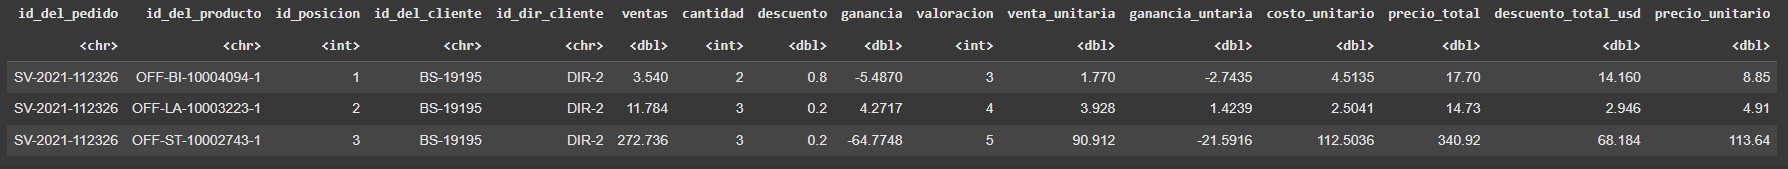

In [ ]:
#3a) ---------------------------------------------------------------------
detalle <- detalle %>%
  mutate(
    venta_unitaria = ventas/cantidad,
    ganancia_untaria = ganancia/cantidad,
    costo_unitario =  venta_unitaria - ganancia_untaria,
    precio_total = ventas/(1-descuento),
    descuento_total_usd = precio_total*descuento,
    precio_unitario = precio_total/cantidad
  )

  detalle %>%
  filter(id_del_pedido == "SV-2021-112326")

id_del_pedido,id_del_producto,id_posicion,id_del_cliente,id_dir_cliente,ventas,cantidad,descuento,ganancia,valoracion,venta_unitaria,ganancia_untaria,costo_unitario,precio_total,descuento_total_usd,precio_unitario
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SV-2021-112326,OFF-BI-10004094-1,1,BS-19195,DIR-2,3.540,2,0.8,-5.4870,3,1.770,-2.7435,4.5135,17.70,14.160,8.85
SV-2021-112326,OFF-LA-10003223-1,2,BS-19195,DIR-2,11.784,3,0.2,4.2717,4,3.928,1.4239,2.5041,14.73,2.946,4.91
SV-2021-112326,OFF-ST-10002743-1,3,BS-19195,DIR-2,272.736,3,0.2,-64.7748,5,90.912,-21.5916,112.5036,340.92,68.184,113.64





**P3b) (5pt)** Desde el área de productos se le solicita el listado de todos los productos que registraron al menos una venta en todo el período de análisis con la siguiente información en un archivo *.csv:
  * `id_del_producto`: Id del producto.
  * `precio_unitario_actual`: `precio_unitario` más reciente registrado en las ventas de cada producto.
  * `unidades_vendidas`: Total de unidades vendidas del producto durante todo el período de análisis. Considere la suma de `cantidad`

Su código debe generar el csv resultante y guardarlo en el directorio de trabajo.

   1. NOTA: Tenga en cuenta que un producto puede tener varios precios unitarios a lo largo del tiempo. Para este efecto, reporte el precio de venta mas reciente registrada en las ventas. <br><br>
    En caso de requerirlo, puede ser de utilidad ordenar por `id_del_producto` y `fecha_del_pedido`, luego agrupar por `id_del_producto` (ver ejemplo de más abajo). Luego de esto puede ser de utilidad el uso de la función `row_number()`

   2. NOTA: Considere el uso de la `fecha_del_pedido` para cualquier ordenamiento que sea requerido.
   3. NOTA: Tenga en consideración además que las fechas de pedido están en la cabecera y el `precio_unitario` en el detalle. <br>
   4. NOTA: Su tabla debe contener solo una fila por `id_de_producto` con la información requerida.
   5. NOTA: La tabla requerida deberá tener la siguiente estructura: <br>
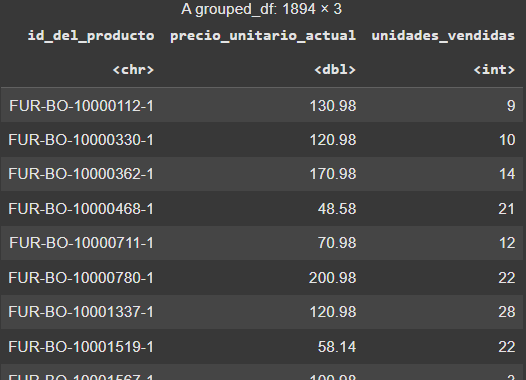

In [ ]:
# Ejemplo:
trx <- data.frame(
  fecha_del_pedido = c(3,2,1,9,3,4,2),
  id_del_producto = c("a","b","a","c","b","c","c"),
  precio = c(10,2,10,20,3,10,8))

trx

trx %>%
  arrange(id_del_producto, desc(fecha_del_pedido)) %>%
  group_by(id_del_producto) # Luego puede rescatar el precio de la fecha más reciente.

fecha_del_pedido,id_del_producto,precio
<dbl>,<chr>,<dbl>
3,a,10
2,b,2
1,a,10
9,c,20
3,b,3
4,c,10
2,c,8


fecha_del_pedido,id_del_producto,precio
<dbl>,<chr>,<dbl>
3,a,10
1,a,10
3,b,3
2,b,2
9,c,20
4,c,10
2,c,8


In [ ]:
 #3b) ---------------------------------------------------------------------
 # Precio unitario más reciente por producto
 reporte_productos <- cabecera %>%
   left_join(detalle,by = "id_del_pedido") %>% # 1pt por el join
   arrange(id_del_producto,desc(fecha_del_pedido)) %>%
   group_by(id_del_producto) %>%
   mutate(rk = row_number(),
          unidades_vendidas = sum(cantidad)) %>%
   filter(rk == 1) %>%
   rename(precio_unitario_actual = precio_unitario) %>% # 2 pt por identificar el registro más reciente
   select(id_del_producto, precio_unitario_actual,unidades_vendidas ) # 1 pto por retornar el dataframe solicitado

nrow(reporte_productos)
(reporte_productos)

write.csv(reporte_productos, "reporte_productos.csv", row.names = F)


[1] 1894

id_del_producto,precio_unitario_actual,unidades_vendidas
<chr>,<dbl>,<int>
FUR-BO-10000112-1,130.98,9
FUR-BO-10000330-1,120.98,10
FUR-BO-10000362-1,170.98,14
FUR-BO-10000468-1,48.58,21
FUR-BO-10000711-1,70.98,12
FUR-BO-10000780-1,200.98,22
FUR-BO-10001337-1,120.98,28
FUR-BO-10001519-1,58.14,22
FUR-BO-10001567-1,100.98,3



**P3c) (2pt)** Se le solicita identificar los productos más demandados en todo el período de análisis, para ello, ¿Cuáles son los 5 productos con más unidades vendidas?<br>
NOTA: Puede utilizar la tabla de la pregunta anterior o basar su respuesta en la tabla de detalle. <br><br>
**P3d) (2pt)** Además de los id's de los productos considere indicar claramente la descripción de cada uno de ellos y sus categorías y subcategorías.<br>
NOTA: De ser de utilidad puede considerar el uso de la función `slice()`. <br><br>
**P3e) (4pt)** Ahora se quiere saber si el producto con más unidades vendidas cambia año a año. ¿Cuál es son el producto con más unidades vendidas para cada año?. ¿Cambia este producto año a año?


In [ ]:
#3c y d) ---------------------------------------------------------------------
# Usando la tabla ya creada
 reporte_productos %>%
 arrange(desc(unidades_vendidas)) %>%
 head(5) %>%
 left_join(producto, by = "id_del_producto")

# Usando detalle.

detalle %>%
  group_by(id_del_producto) %>%
    summarise(unidades_vendidas = sum(cantidad)) %>%
    arrange(desc(unidades_vendidas)) %>%
    head(5) %>%
    left_join(producto, by = "id_del_producto")

#los 5 productos con mayor cantidad de unidades vendidas son los siguientes:

id_del_producto,precio_unitario_actual,unidades_vendidas,nombre_del_producto,categoria,subcategoria
<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
FUR-FU-10002501-1,12.39,84,Nu-Dell Executive Frame,Mobiliario,Mobiliario
OFF-BI-10001718-1,63.98,72,GBC DocuBind P50 Personal Binding Machine,Material de oficina,Carpetas
OFF-BI-10001524-1,20.98,67,GBC Premium Transparent Covers with Diagonal Lined Pattern,Material de oficina,Carpetas
FUR-CH-10002647-1,70.98,64,"Situations Contoured Folding Chairs, 4/Set",Mobiliario,Sillas
FUR-TA-10001095-1,174.29,61,Chromcraft Round Conference Tables,Mobiliario,Mesas


id_del_producto,unidades_vendidas,nombre_del_producto,categoria,subcategoria
<chr>,<int>,<chr>,<chr>,<chr>
FUR-FU-10002501-1,84,Nu-Dell Executive Frame,Mobiliario,Mobiliario
OFF-BI-10001718-1,72,GBC DocuBind P50 Personal Binding Machine,Material de oficina,Carpetas
OFF-BI-10001524-1,67,GBC Premium Transparent Covers with Diagonal Lined Pattern,Material de oficina,Carpetas
FUR-CH-10002647-1,64,"Situations Contoured Folding Chairs, 4/Set",Mobiliario,Sillas
FUR-TA-10001095-1,61,Chromcraft Round Conference Tables,Mobiliario,Mesas


In [ ]:
#3e) ---------------------------------------------------------------------
# Podemos generar la columna año en la cabecera para luego utilizarla en nuestros filtros.
# Luego  cruzamos la cabecera con el detalle para luego filtrar por año.
# Finalmente podemos agrupar por año y producto para obtener el total de unidadaes por producto-año.
# Para el top 5 tenemos dos opciones; utilizar un ranking (con row_number o dense_rank), o generar 4 consultas (una por año).
cabecera %>%
  mutate(anio = lubridate::year(fecha_del_pedido)) %>%
  left_join(detalle,by = "id_del_pedido") %>% # 1pt por el join
  group_by(anio, id_del_producto) %>%
  summarise(unidades_vendidas = sum(cantidad)) %>%
  group_by(anio)  %>%
  mutate(rk = dense_rank(desc(unidades_vendidas))) %>%
  filter(rk == 1) %>%
  arrange(desc(anio), rk)


# 4 consultas y bind_rows() solo para ordenar la salida.

bind_rows(
cabecera %>%
  mutate(anio = lubridate::year(fecha_del_pedido)) %>%
  left_join(detalle,by = "id_del_pedido") %>% # 1pt por el join
  group_by(anio, id_del_producto) %>%
  summarise(unidades_vendidas = sum(cantidad)) %>%
  filter(anio == 2021) %>%
  arrange(desc(unidades_vendidas)) %>%
  head(1),

   cabecera %>%
    mutate(anio = lubridate::year(fecha_del_pedido)) %>%
    left_join(detalle,by = "id_del_pedido") %>% # 1pt por el join
    group_by(anio, id_del_producto) %>%
    summarise(unidades_vendidas = sum(cantidad)) %>%
    filter(anio == 2022) %>%
    arrange(desc(unidades_vendidas)) %>%
    head(1),

   cabecera %>%
    mutate(anio = lubridate::year(fecha_del_pedido)) %>%
    left_join(detalle,by = "id_del_pedido") %>% # 1pt por el join
    group_by(anio, id_del_producto) %>%
    summarise(unidades_vendidas = sum(cantidad)) %>%
    filter(anio == 2023) %>%
    arrange(desc(unidades_vendidas)) %>%
    head(1),

  cabecera %>%
    mutate(anio = lubridate::year(fecha_del_pedido)) %>%
    left_join(detalle,by = "id_del_pedido") %>% # 1pt por el join
    group_by(anio, id_del_producto) %>%
    summarise(unidades_vendidas = sum(cantidad)) %>%
    filter(anio == 2024) %>%
    arrange(desc(unidades_vendidas)) %>%
    head(1))

  # Se observa que para el 2024 y 2021 coincide con el producto más demandado si se considera todo el período de análisis. Pero esto cambia para los años 2023 y 2022.

`summarise()` has grouped output by 'anio'. You can override using the
`.groups` argument.


anio,id_del_producto,unidades_vendidas,rk
<dbl>,<chr>,<int>,<int>
2024,FUR-FU-10002501-1,39,1
2023,FUR-TA-10001095-1,39,1
2022,OFF-ST-10000943-1,26,1
2021,FUR-FU-10002501-1,32,1


`summarise()` has grouped output by 'anio'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'anio'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'anio'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'anio'. You can override using the
`.groups` argument.


anio,id_del_producto,unidades_vendidas
<dbl>,<chr>,<int>
2021,FUR-FU-10002501-1,32
2022,OFF-ST-10000943-1,26
2023,FUR-TA-10001095-1,39
2024,FUR-FU-10002501-1,39


## Preguntas 1.4: Análisis detallado de ventas.
**P4a) (4pt)** Genere un gráfico de líneas que muestre el total de las ventas por cada año y mes. ¿Se observa alguna tendencia? Comente al respecto. Considere incorporar una curva de tendencia con `geom_smooth()`<br>
  Tenga en cuenta que su gráfico:
  * Debe contener un título.
  * Debe incluir nombres sugerentes en los ejes.
  * De ser de utilidad puede generar el período (año-mes) del pedido, utilizando la siguiente expresión: `format(as.Date(fecha_del_pedido),"%Y-%m")`
  * Si generó una agrupación por año-mes o bien por período, notará que el gráfico de lineas requerirá una variable de tipo date en el eje X. Para ello puede considerar en crear una fecha auxiliar concatenando un "01". Por ejemplo, si su período es "2024-05", genere una fecha (tipo Date) con "2024-05-01" y utilice esta última para su gráfico.
<br><br>
Como referencia considere el siguiente gráfico.

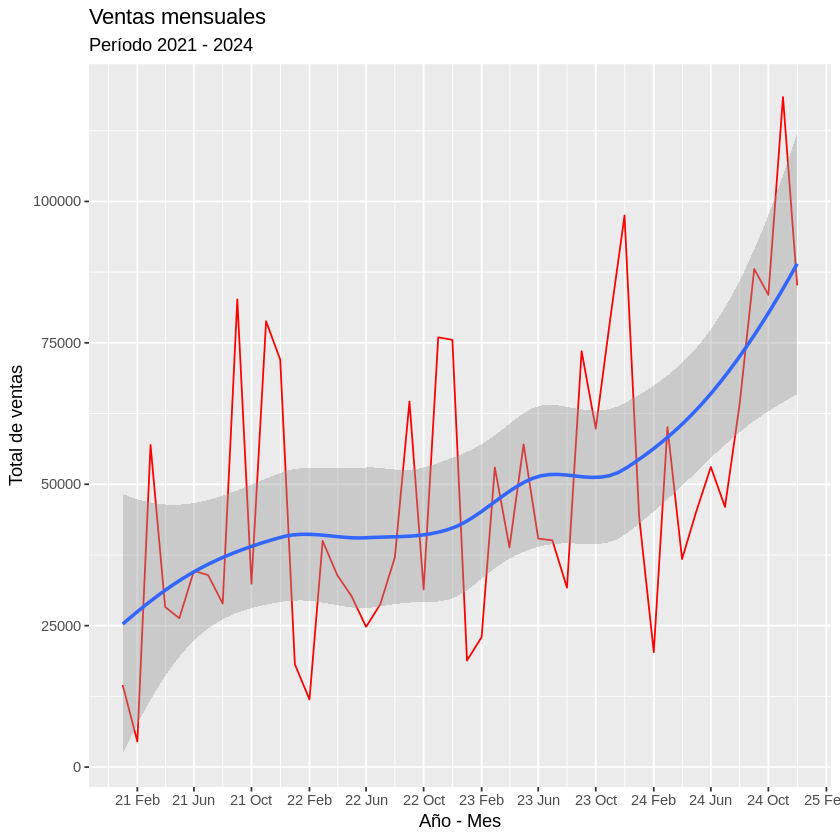







**P4b) (6pt)** Mediante un gráfico de barras, muestre las ventas totales (suma de `ventas` para las 20 localidades con más ventas generadas durante el 2024. Considere cada localidad como la combinación de `pais_region` y `estado_provincia`. Su gráfico debe contemplar al menos los siguientes aspectos:

 * Debe contener un título.
 * Debe incluir nombres sugerentes en los ejes.
 * Los nombres de los países y restados deben ser legibles
 * Incluya etiquetas en la parte superior de cada barra, que muestre el total de ventas del 2024 para cada localidad . <br>

Como ayuda, puede ser de utilidad investigar la usabilidad de las siguientes funciones de ggplot2.

 * `labs()`: Para la inclusión de nombres en los ejes, títulos, leyenda etc.
 * `geom_label()`; `geom_text()`: para añadir etiquetas esobre las gráficas.
 * `reorder()`: Para reordenar una variable en la función `aes()`.
 * `coord_flip()`: Para invertir ejes.
 * `theme()`: Para modificar aspectos visuales de su gr´fico.

Como referencia puede considerar el siguiente gráfico. <br>

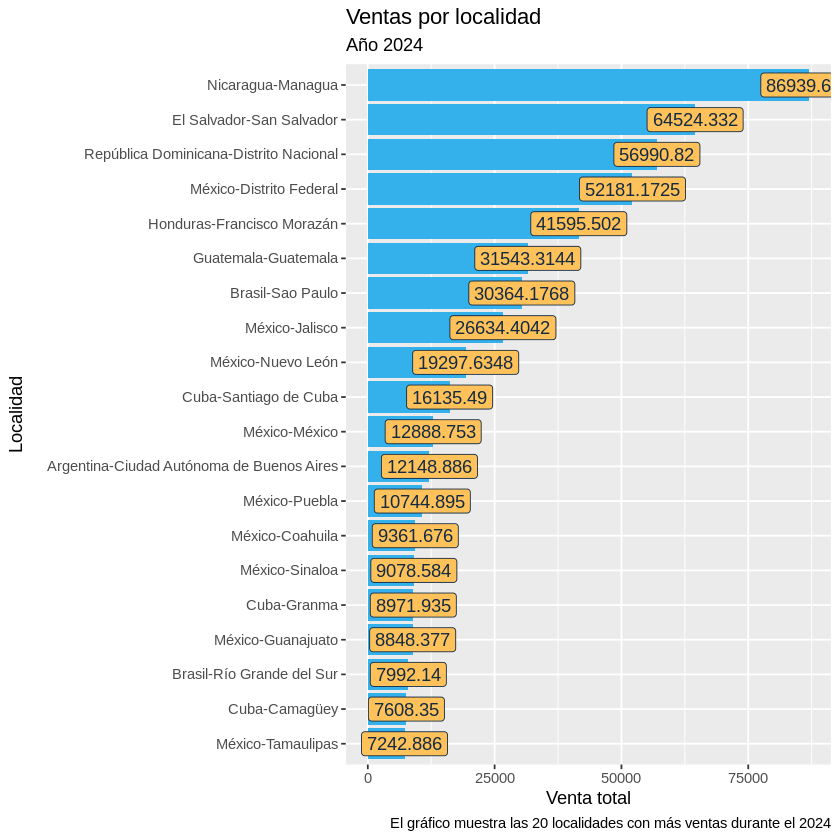

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


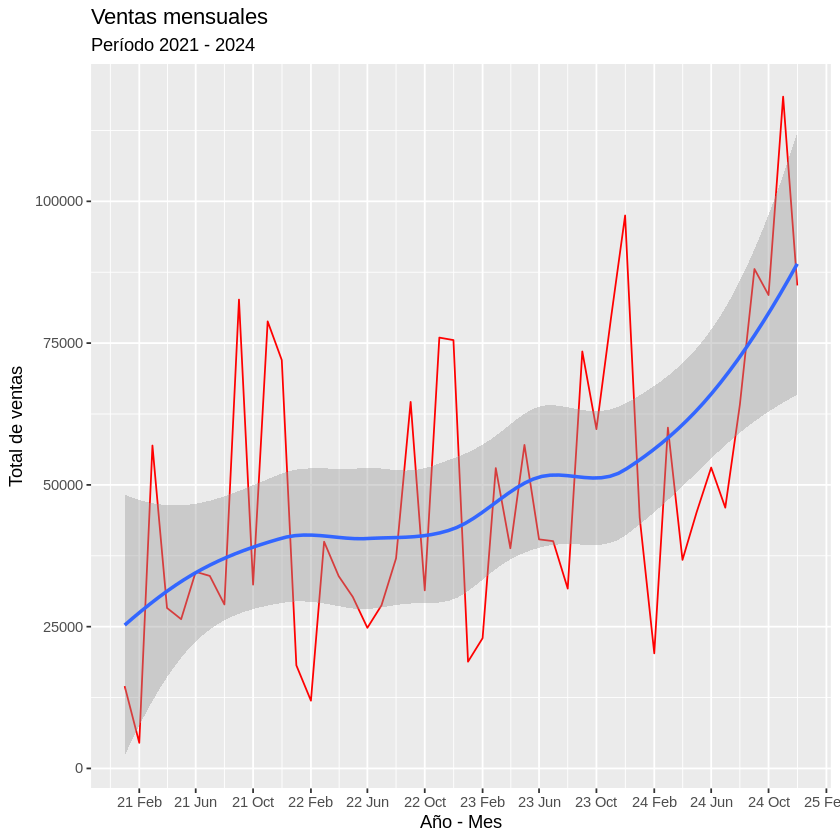

In [ ]:
# P4
## Respusta
#a) ---------------------------------------------------------------------
#  Debe contener un título.
#Debe incluir nombres sugerentes en los ejes.
cabecera %>%
  left_join(detalle, by = "id_del_pedido") %>%
  mutate(periodo = format(as.Date(fecha_del_pedido),"%Y-%m")) %>%
  group_by(periodo) %>%
  summarise(total_ventas = sum(ventas)) %>%
  mutate(periodo2 = as.Date(paste(periodo,"01",sep = "-")))%>%
  ggplot() +
  aes(x = periodo2, y = total_ventas) +
  geom_line(col = "red") +
  geom_smooth()+
  scale_x_date(date_breaks = "4 month", date_labels = "%y %b") +
  labs(title = "Ventas mensuales",
       subtitle = "Período 2021 - 2024",
       x ="Año - Mes",
       y = "Total de ventas")

In [ ]:
# P1.4
## Respusta
#b) ---------------------------------------------------------------------
# Primero podemos generar una tabla resumen con las 20 localidades buscadas.
# OP1
resumen_ventas_localidad <- cabecera %>%
  mutate(anio = lubridate::year(fecha_del_pedido)) %>%
  filter(anio == 2024) %>%
  left_join(detalle, by = "id_del_pedido") %>%
  left_join(direcciones, by = c("id_del_cliente.y" = "id_del_cliente", "id_dir_cliente")) %>%
  group_by(pais_region, estado_provincia) %>%
  summarise(total_ventas = sum(ventas)) %>%
  ungroup() %>%
  slice_max(order_by = total_ventas, n = 20)

# OP2
(resumen_ventas_localidad <- cabecera %>%
  mutate(anio = lubridate::year(fecha_del_pedido)) %>%
  filter(anio == 2024) %>%
  left_join(detalle, by = "id_del_pedido") %>%
  left_join(direcciones, by = c("id_del_cliente.y" = "id_del_cliente", "id_dir_cliente")) %>%
  group_by(pais_region, estado_provincia) %>%
  summarise(total_ventas = sum(ventas)) %>%
  arrange(desc(total_ventas)) %>%
  head(20))

`summarise()` has grouped output by 'pais_region'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'pais_region'. You can override using the
`.groups` argument.


pais_region,estado_provincia,total_ventas
<chr>,<chr>,<dbl>
Nicaragua,Managua,86939.601
El Salvador,San Salvador,64524.332
República Dominicana,Distrito Nacional,56990.820
México,Distrito Federal,52181.173
Honduras,Francisco Morazán,41595.502
Guatemala,Guatemala,31543.314
Brasil,Sao Paulo,30364.177
México,Jalisco,26634.404
México,Nuevo León,19297.635


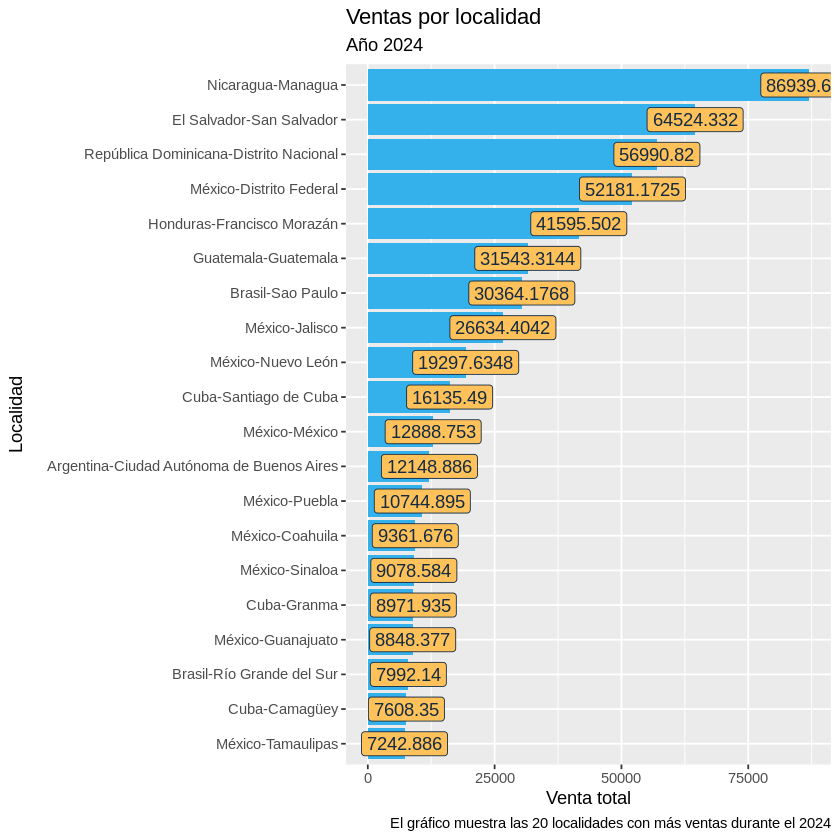

In [ ]:
# Luego generamos el gráfico

resumen_ventas_localidad %>%
  ggplot() +
  aes(x = reorder(paste(pais_region,estado_provincia,sep = "-"),total_ventas), y = total_ventas) +
  geom_bar(stat = "identity", fill = "#34b1eb") +
  labs(x = "Localidad",
       y = "Venta total",
       title = "Ventas por localidad",
       subtitle = "Año 2024",
       caption = "El gráfico muestra las 20 localidades con más ventas durante el 2024") +
  coord_flip() +
  geom_label(aes(label = total_ventas),
    #position = position_dodge(width = .9),
    #vjust=-0.25,
    color = "#132B43",fill = "#FFC159")


# Preguntas 1.5
Para un reporte del área de ventas, se requiere analizar las unidades vendidas de los 5 producos más vendidso. Para esto, se le pide generar un gráfico de barras "stackeado" que muestre las unidades vendidas **para los 5 productos con mayor número de unidades vendidas durante el 2024**, subdivididos por la cantidad de productos con 1, 2, 3 , 4 y 5 estrellas de `valoracion`.<br>

Para guiar su análisis usted deberá:

**P5a) (2pt)** Identifique las 5 subcategorías de productos con mayor cantidad de unidades vendidas durante el 2024. Para ello genere una tabla llamada `top_5` con estos 5 registros. Esta debe contener la siguiente estructura como referencia. <br>

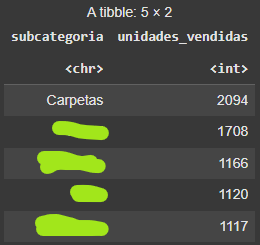

In [ ]:
# P1.4
## Respusta
#a) ---------------------------------------------------------------------

# Primero podemos identificar los
(top_5 <- cabecera %>%
  mutate(anio = lubridate::year(fecha_del_pedido)) %>%
  filter(anio == 2024) %>%
  left_join(detalle, by = "id_del_pedido") %>%
  left_join(producto, by = "id_del_producto") %>%
  group_by(subcategoria) %>%
  summarise(unidades_vendidas = sum(cantidad)) %>%
  arrange(desc(unidades_vendidas)) %>%
  head(5))

subcategoria,unidades_vendidas
<chr>,<int>
Carpetas,2094
Papel,1708
Mobiliario,1166
Arte,1120
Teléfonos,1117



**P5b) (2pt)** Genere otra tabla resumen llamada `resumen_subcat_val` que contenga el total de unidades vendidas agrupadas por combinación de `subcategoria` de producto y `valoracion`. A modo de ejemplo, notará que las 2094 unidades vendidas en el 2024 para la subcategoría de `Carpetas`, se distribuye de la siguiente manera:
 * 1 estrella: 	397 undades.
 * 2 estrella: 	491 undades.
 * 3 estrella: 	477 undades.
 * 4 estrella: 	457 undades.
 * 5 estrella: 	272 undades.

Como referencia, su tabla deberá contener 85 registros y tendrá la siguiente estructura. <br>

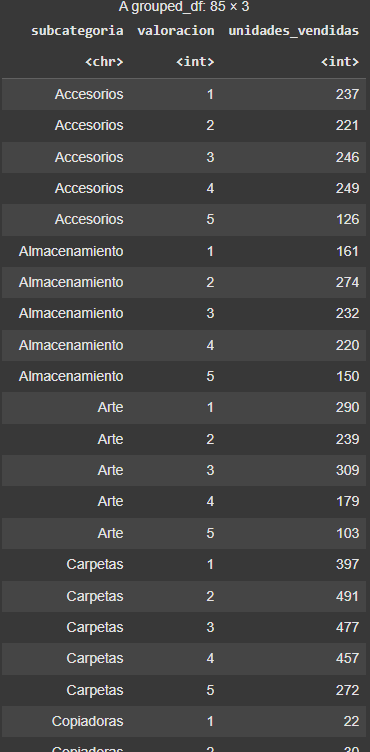

In [ ]:
# P1.4
## Respusta
#b) ---------------------------------------------------------------------

# Primero podemos identificar los
(resumen_subcat_val <- cabecera %>%
  mutate(anio = lubridate::year(fecha_del_pedido)) %>%
  filter(anio == 2024) %>%
  left_join(detalle, by = "id_del_pedido") %>%
  left_join(producto, by = "id_del_producto") %>%
  group_by(subcategoria, valoracion) %>%
  summarise(unidades_vendidas = sum(cantidad)) )

`summarise()` has grouped output by 'subcategoria'. You can override using the
`.groups` argument.


subcategoria,valoracion,unidades_vendidas
<chr>,<int>,<int>
Accesorios,1,237
Accesorios,2,221
Accesorios,3,246
Accesorios,4,249
Accesorios,5,126
Almacenamiento,1,161
Almacenamiento,2,274
Almacenamiento,3,232
Almacenamiento,4,220


**P5c) (2pt)** Finalmente, genere una tabla que contenga el cruce entre ambas tablas generadas anteriormente (`top_5` y `resumen_subcat_val` cruzando por `subcategoría`) y muestre sólo el resultado de dicho cruce para las subcategorías de `top_5`.<br> <br>
Genere una columna llamada `pje_unidades` que contenga el porcentaje de unidades vendidas por valoración respecto del total de unidades de la subcategoría (`unidades_vendidas/unidades_vendidas_totales`).
Su dataframe debe contener 25 registros y considere la siguiente estructura como referencia. <br>

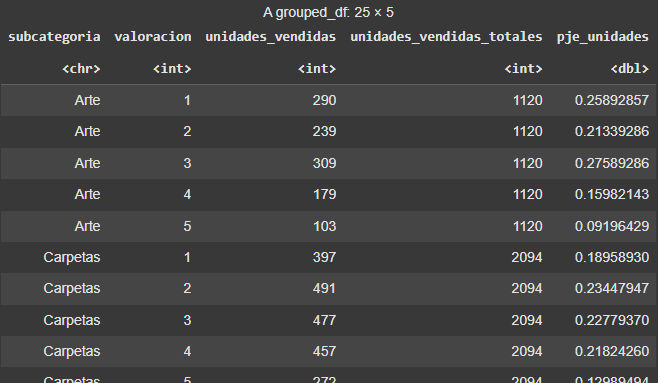
<br>

NOTA: En esta imagen, la variable llamada `unidades_vendidas` corresponde a `undades_vendidas` de la tabla `resumen_subcat_val`, mientras  que `unidades_vendidas_totales` corresponde a `undades_vendidas` de `top_5`. De ser necesario,  considere renombrar las columnas de su tabla resultante del cruce.


In [ ]:
#c) ---------------------------------------------------------------------
(aux <- resumen_subcat_val %>%
   inner_join(top_5, by = "subcategoria") %>%
   rename(unidades_vendidas = unidades_vendidas.x,
          unidades_vendidas_totales = unidades_vendidas.y ) %>%
   mutate(pje_unidades = unidades_vendidas/unidades_vendidas_totales))




subcategoria,valoracion,unidades_vendidas,unidades_vendidas_totales,pje_unidades
<chr>,<int>,<int>,<int>,<dbl>
Arte,1,290,1120,0.25892857
Arte,2,239,1120,0.21339286
Arte,3,309,1120,0.27589286
Arte,4,179,1120,0.15982143
Arte,5,103,1120,0.09196429
Carpetas,1,397,2094,0.18958930
Carpetas,2,491,2094,0.23447947
Carpetas,3,477,2094,0.22779370
Carpetas,4,457,2094,0.21824260


**P5d) (6pt)** A partir de la tabla anterior genere el gráfico stackeado que se le fue solicitado. Considere "apilar" las `unidades_vendidas` y muestre en etiquetas el total de unidades junto al porcentaje al que equivale la respectiva cantidad de unidades_vendidas de la categoría de clasificación. <br>
Como referencia tenga en cuenta el siguiente gráfico. El orden de las columnas es opcional (consulte `reorder()`), al igual que el título de la leyenda. <br>

NOTA: Considere tratar la `valoracion` como una categoría y no como un número.
 <br>

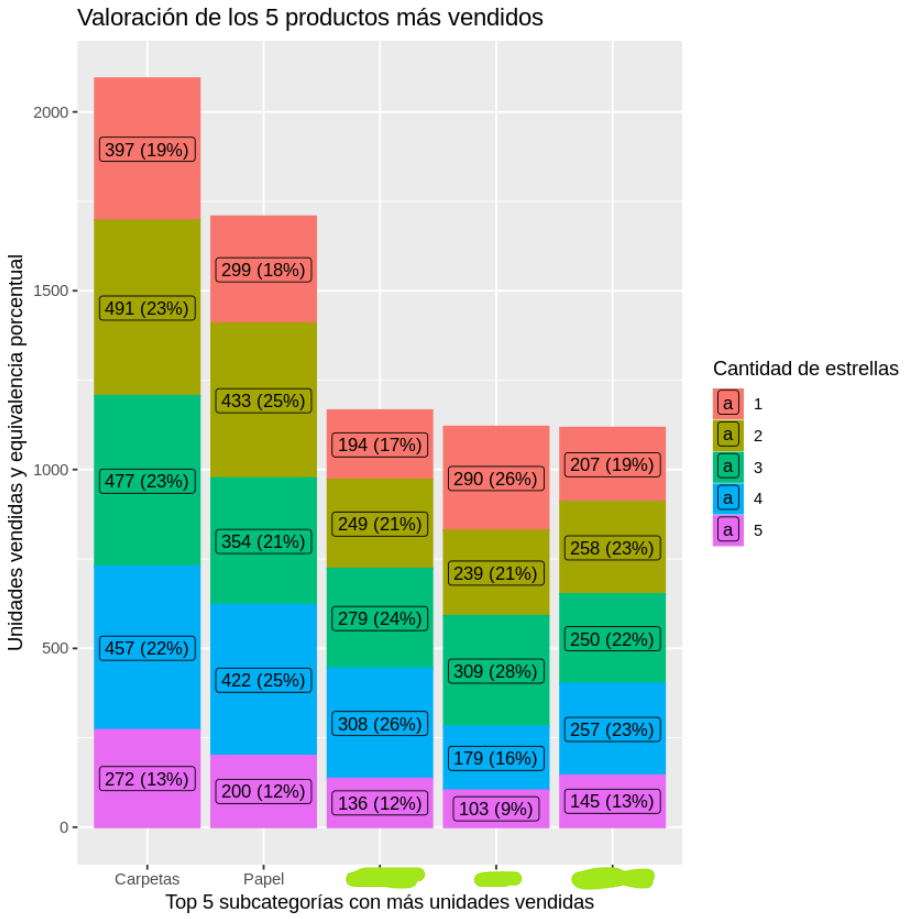

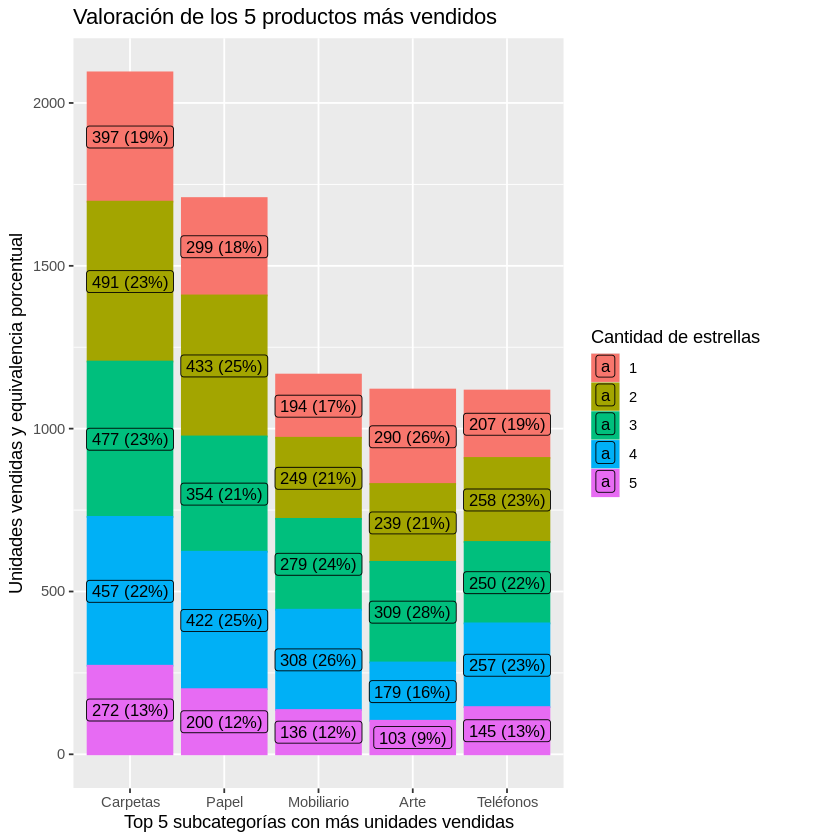

In [ ]:
#c) ---------------------------------------------------------------------
aux %>%
  ggplot() +
  aes(x = reorder(subcategoria,-unidades_vendidas_totales), y = unidades_vendidas, label = unidades_vendidas_totales,color = as.factor(valoracion),fill =  as.factor(valoracion)) +
  geom_bar(stat = "identity",position = "stack") + # por defecto viene el stacked bar plot
  geom_label(mapping = aes(label = paste0(unidades_vendidas," (",round(100*pje_unidades,0),"%)") ), size = 3.5, position = position_stack(vjust = 0.5) , color = "black") +
  labs(title = "Valoración de los 5 productos más vendidos",
       fill = "Cantidad de estrellas",
       color = "Cantidad de estrellas",
       x = "Top 5 subcategorías con más unidades vendidas",
       y = "Unidades vendidas y equivalencia porcentual")

